
Logistic Regression - Training Accuracy: 0.99
Logistic Regression - Testing Accuracy: 0.99
Logistic Regression - Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31355
           1       0.98      0.97      0.98      8655

    accuracy                           0.99     40010
   macro avg       0.99      0.98      0.99     40010
weighted avg       0.99      0.99      0.99     40010



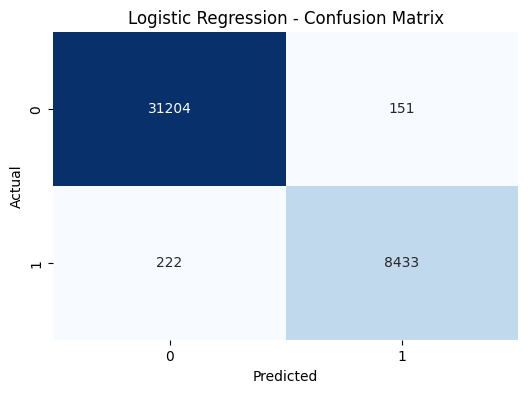


Decision Tree Classifier - Training Accuracy: 0.99
Decision Tree Classifier - Testing Accuracy: 0.99
Decision Tree Classifier - Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31355
           1       0.99      0.98      0.98      8655

    accuracy                           0.99     40010
   macro avg       0.99      0.99      0.99     40010
weighted avg       0.99      0.99      0.99     40010



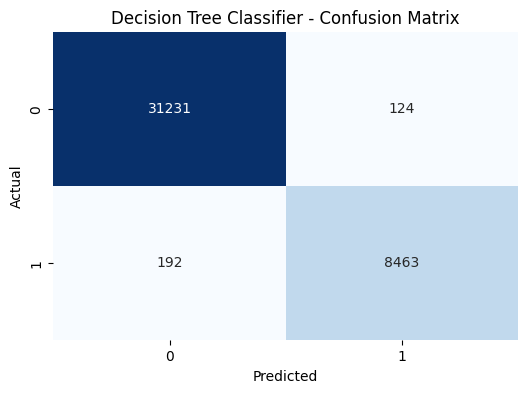

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def load_and_preprocess_data(filepath):
    """
    Load data from a CSV file, handle missing values, and apply one-hot encoding.
    """
    try:
        data = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: File {filepath} not found.")
        return None

    selected_data = data[['Make', 'Model', 'Model Year', 'Electric Vehicle Type']].copy()
    selected_data.dropna(inplace=True)
    encoded_data = pd.get_dummies(selected_data, columns=['Make', 'Model', 'Electric Vehicle Type'], drop_first=True)
    return encoded_data.astype(int)

def split_data(data):
    """
    Split the dataset into features (X) and target labels (y).
    """
    X = data.drop(['Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)'], axis=1)
    y = data['Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)']
    return X, y

def standardize_data(X):
    """
    Standardize feature data using StandardScaler.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def train_logistic_regression(X_train, y_train):
    """
    Train Logistic Regression model.
    """
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    return log_reg

def train_decision_tree(X_train, y_train):
    """
    Train Decision Tree Classifier model.
    """
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    return tree

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluate the model and print performance metrics.
    """
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f"\n{model_name} - Training Accuracy: {accuracy_train:.2f}")
    print(f"{model_name} - Testing Accuracy: {accuracy_test:.2f}")

    print(f"{model_name} - Classification Report on Test Data:")
    print(classification_report(y_test, y_pred_test))

    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def main():
    # Load and preprocess the data
    filepath = "Electric_Vehicle_Population_Data.csv"
    data = load_and_preprocess_data(filepath)
    if data is None:
        return

    # Split data into features and labels
    X, y = split_data(data)

    # Standardize feature data
    X_scaled = standardize_data(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train and evaluate Logistic Regression
    log_reg = train_logistic_regression(X_train, y_train)
    evaluate_model(log_reg, X_train, X_test, y_train, y_test, "Logistic Regression")

    # Train and evaluate Decision Tree Classifier
    tree = train_decision_tree(X_train, y_train)
    evaluate_model(tree, X_train, X_test, y_train, y_test, "Decision Tree Classifier")

# Run the main program
if __name__ == "__main__":
    main()

Based on the confusion matrices and classification reports for the Logistic Regression and Decision Tree classifiers:

1. Overall Accuracy
  
  Both models achieve a testing accuracy of 0.99, indicating high reliability in predicting the outcomes for the dataset.

2. Precision, Recall, and F1-Score

  Precision: Both models show nearly identical precision levels. Logistic Regression has a precision of 0.99 for class 0 and 0.98 for class 1. The Decision Tree also shows a precision of 0.99 for both classes, indicating that they are both highly effective at identifying positive cases accurately.

  Recall: Both models show nearly Recall.The Logistic Regression model achieves a recall of 1.00 for class 0 and 0.97 for class 1, while the Decision Tree has a recall of 1.00 for class 0 and 0.98 for class 1. This suggests that the Decision Tree model has a slightly better ability to detect positive instances.

  F1-Score: Both models show nearly F1-scores, with Logistic Regression scoring 0.99 for class 0 and 0.98 for class 1. The Decision Tree also scores 0.99 for both classes, indicating an excellent balance between precision and recall for both models.
3. Confusion Matrix Comparison

  Logistic Regression:

  True Negatives: 31,204

  False Positives: 151

  True Positives: 8,433

  False Negatives: 222

  Decision Tree:

  True Negatives: 31,231

  False Positives: 124

  True Positives: 8,463

  False Negatives: 192

  The Decision Tree classifier shows fewer false positives and false negatives compared to Logistic Regression.

Conclusion:
  
  Both classifiers demonstrate excellent performance, with high accuracy, precision, recall, and F1-scores. However, the Decision Tree model is marginally superior, as it produces fewer false positives and false negatives, enhancing its robustness. Therefore, for this classification task, the Decision Tree model would be the preferred option.